# Edge Detection & Enhancement
   **A. Read the paper image at the input, apply sharpening filters to it. On the other hand, apply a blur filter to the original image, subtract the specified image from the original image, and add the result to the original image. Compare and report the output of the two procedures.**
   
   **B. Apply Sobel filter to kodim05 image in the direction of length and width. Sum the images. Apply the same process with the F filter, which is applied in one dimension and its values are specified for you in two directions of length to the image. Like Sobel filter specifies two outputs on one edge in the X direction and the other on the Y edge. Sum the outputs.**
   
   **G = √(Gx^2 + Gy^2)**
   
   **‫=‪F‬‬ ‫‪[−0.0052625,‬‬ ‫‪−0.0173466,‬‬ ‫‪−0.0427401,‬‬ ‫‪−0.0768961,‬‬
‫‪−‬‬ ‫‪0.957739,‬‬ ‫‪−0.0696751,‬‬ ‫‪0,‬‬ ‫‪0.6696751,‬‬ ‫‪0.0957739,‬‬ ‫‪0.0768961,‬‬ ‫‪0.0427401,‬‬ ‫‪0.0173466,‬‬ ‪0.0052625]‬**

### Part A

The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output
+ `skimage` for changing and applyting filters to images

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

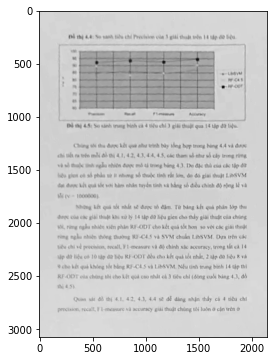

In [214]:
paper = cv2.imread("../../images/paper.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 6))
plt.imshow(paper, cmap="gray")
plt.show()


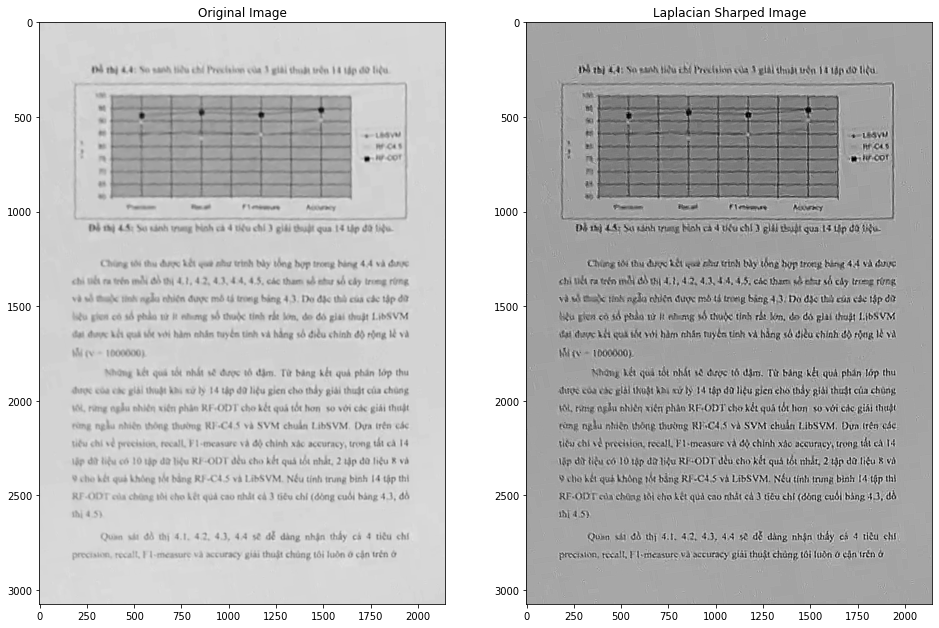

In [149]:
W = np.array([[-1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1],
              [-1, -1, 25, -1, -1],
              [-1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1]])

laplacian_sharped_paper = cv2.filter2D(paper,-1,W)


f, subplt = plt.subplots(1,2,figsize=(16,12))
subplt[0].imshow(paper,cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(laplacian_sharped_paper,cmap='gray')
subplt[1].set_title("Laplacian Sharped Image")
plt.show()

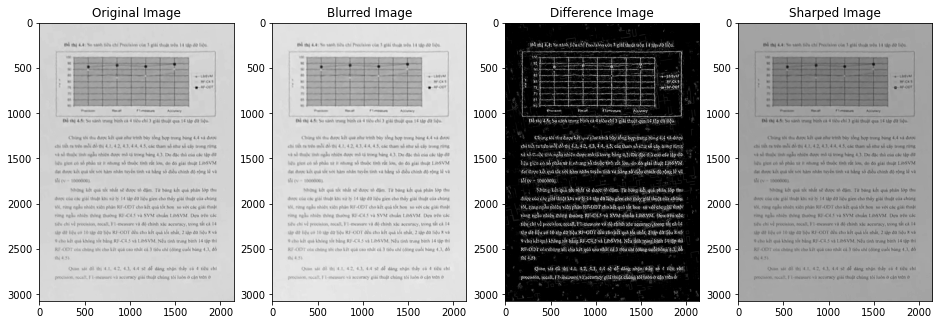

In [150]:
kernel = np.ones((5, 5), dtype=np.float32) / 25
blurred_paper = cv2.filter2D(paper, -1, kernel)

difference = paper - blurred_paper

blurred_sharped_result = paper + difference

f, subplt = plt.subplots(1, 4, figsize=(16, 12))
subplt[0].imshow(paper, cmap="gray")
subplt[0].set_title("Original Image")
subplt[1].imshow(blurred_paper, cmap="gray")
subplt[1].set_title("Blurred Image")
subplt[2].imshow(difference, cmap="gray")
subplt[2].set_title("Difference Image")
subplt[3].imshow(blurred_sharped_result, cmap="gray")
subplt[3].set_title("Sharped Image")

plt.show()

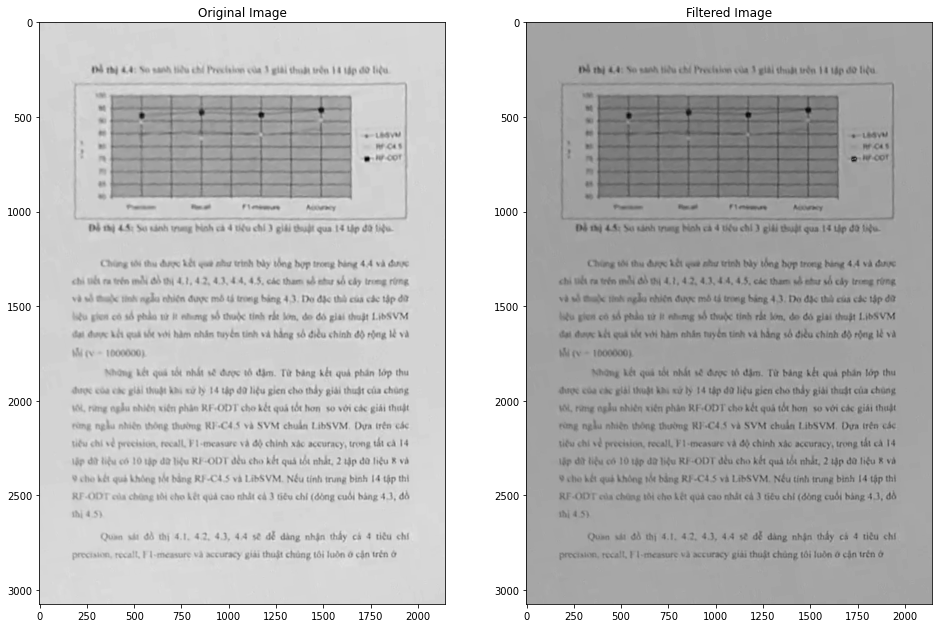

In [41]:
f, subplt = plt.subplots(1, 2, figsize=(16, 12))
subplt[0].imshow(paper, cmap="gray")
subplt[0].set_title("Original Image")
subplt[1].imshow(blurred_sharped_result, cmap="gray")
subplt[1].set_title("Filtered Image")
plt.show()

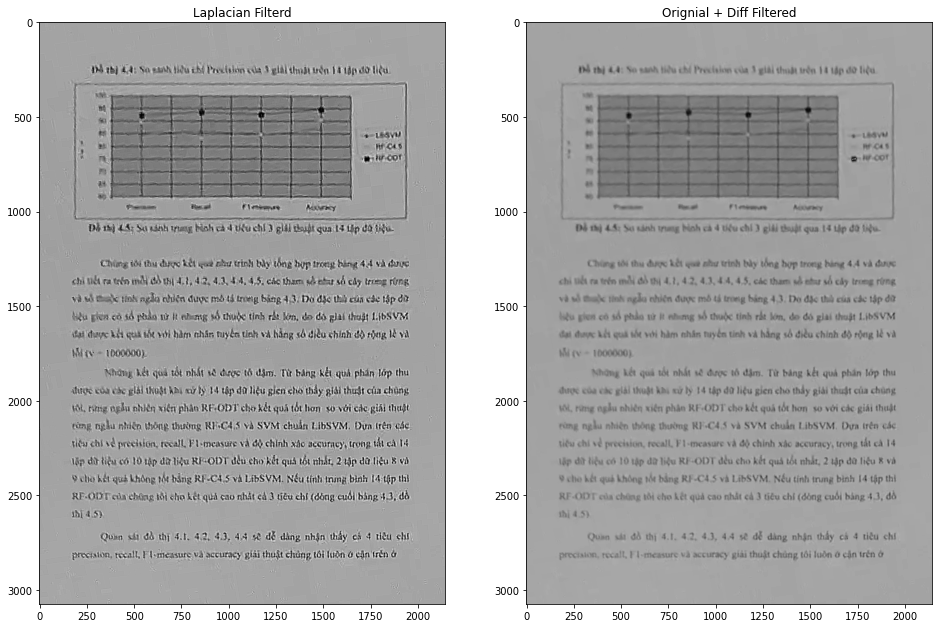

In [42]:
f, subplt = plt.subplots(1, 2, figsize=(16, 12))
subplt[0].imshow(laplacian_sharped_paper, cmap="gray")
subplt[0].set_title("Laplacian Filterd")
subplt[1].imshow(blurred_sharped_result, cmap="gray")
subplt[1].set_title("Orignial + Diff Filtered")
plt.show()

### Part B

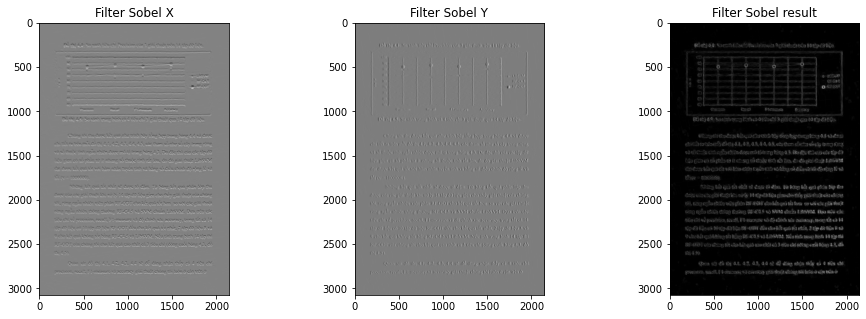

In [217]:
paper = cv2.normalize(
    paper, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F
)

ddepth = cv2.CV_64F

paper_edge_x = cv2.Sobel(paper, ddepth, 0, 1, ksize=5)
paper_edge_y = cv2.Sobel(paper, ddepth, 1, 0, ksize=5)

paper_edge_sobel = np.sqrt((paper_edge_x ** 2) + (paper_edge_y ** 2))


paper_edge_sobel = cv2.normalize(
    paper_edge_sobel, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F
)


f, subplt = plt.subplots(1, 3, figsize=(16, 5))
subplt[0].imshow(paper_edge_x, cmap="gray")
subplt[0].set_title("Filter Sobel X")
subplt[1].imshow(paper_edge_y, cmap="gray")
subplt[1].set_title("Filter Sobel Y")
subplt[2].imshow(paper_edge_sobel, cmap="gray")
subplt[2].set_title("Filter Sobel result")

plt.show()

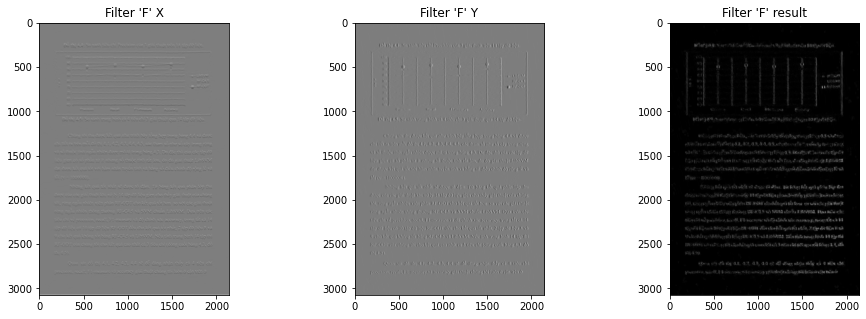

In [218]:
F = [
    -0.0052625,
    -0.0173466,
    -0.0427401,
    -0.0768961,
    -0.957739,
    -0.0696751,
    0,
    +0.0696751,
    +0.957739,
    +0.0768961,
    +0.0427401,
    +0.0173466,
    +0.0052625,
]

paper_edge_Y = np.zeros(paper.shape)
for i, row in enumerate(paper):
    paper_edge_x[i] = np.convolve(F, row, mode="same")

paper_edge_x = np.zeros(paper.shape)
for i, row in enumerate(paper.T):
    paper_edge_x.T[i] = np.convolve(F, row, mode="same")

paper_edge_F = np.sqrt((paper_edge_x ** 2) + (paper_edge_y ** 2))

paper_edge_F = cv2.normalize(
    paper_edge_F, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F
)

f, subplt = plt.subplots(1, 3, figsize=(16, 5))
subplt[0].imshow(paper_edge_x, cmap="gray")
subplt[0].set_title("Filter 'F' X")
subplt[1].imshow(paper_edge_y, cmap="gray")
subplt[1].set_title("Filter 'F' Y")
subplt[2].imshow(paper_edge_F, cmap="gray")
subplt[2].set_title("Filter 'F' result")

plt.show()

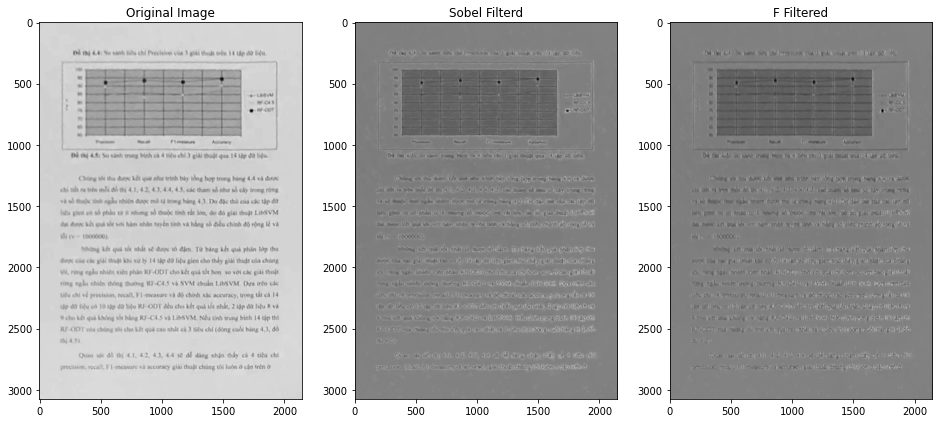

In [211]:
f, subplt = plt.subplots(1, 3, figsize=(16, 12))
subplt[0].imshow(paper, cmap="gray")
subplt[0].set_title("Original Image")
subplt[1].imshow(paper + paper_edge_sobel, cmap="gray")
subplt[1].set_title("Sobel Filterd")
subplt[2].imshow(paper + paper_edge_F, cmap="gray")
subplt[2].set_title("F Filtered")
plt.show()
